# IDB_drilling_monitoring

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

np.random.seed(42)

!nvidia-smi
HOST_path = "/root/autodl-tmp"

SAVE_path = os.path.join(HOST_path, "IDB_drilling_monitoring/regression")

if not os.path.exists(SAVE_path):
    os.makedirs(SAVE_path)

2023-11-16 16:16:21.293633: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Thu Nov 16 16:16:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:98:00.0 Off |                  Off |
| 30%   29C    P8    18W / 450W |      2MiB / 24564MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Load signal data

In [2]:
def load_table(table_path, time_start, time_end):
  SIGNAL_pd = pd.read_excel(table_path)
  # display(SIGNAL_pd)
  SIGNAL_arr = SIGNAL_pd.values[time_start-2+10 : time_end-2-10+1, 1:-1]
  print(type(SIGNAL_arr), SIGNAL_arr.shape, len(SIGNAL_arr)-1, "s")
  # print(SIGNAL_arr)
  return SIGNAL_arr

Y01A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 140, 325)
Y01B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 609, 791)
Y01C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 1115, 1305)
Y01D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 1530, 1733)

Y02A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 3795, 4021)
Y02B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 4241, 4461)
Y02C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 4649, 4877)
Y02D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 5100, 5337)

Y03A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 5780, 6059)
Y03B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 6267, 6500)
Y03C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 6760, 7005)
Y03D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-1.xls"), 7223, 7521)

Y04A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 123, 221)
Y04B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 463, 563)
Y04C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 773, 882)
Y04D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 1103, 1217)

Y05A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 1545, 1678)
Y05B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 1931, 2037)
Y05C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 2265, 2403)
Y05D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 2613, 2747)

Y06A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 3051, 3165)
Y06B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 3377, 3490)
Y06C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 3685, 3830)
Y06D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-2.xls"), 4169, 4287)

Y07A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 146, 439)
Y07B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 692, 929)
Y07C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 1129, 1389)
Y07D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 1592, 1837)

Y08A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 2316, 2567)
Y08B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 2809, 3058)
Y08C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 3431, 3677)
Y08D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 3895, 4157)

Y09A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 4437, 4705)
Y09B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 4951, 5229)
Y09C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 5869, 6178)
Y09D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 6396, 6675)

Y10A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 8285, 8415)
Y10B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 8629, 8800)
Y10C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 9087, 9285)
Y10D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 9710, 9911)

Y11A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 10370, 10580)
Y11B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 10785, 10975)
Y11C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 11144, 11332)
Y11D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 11733, 11967)

Y12A = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 12445, 12697)
Y12B = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 12955, 13146)
Y12C = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 13325, 13589)
Y12D = load_table(os.path.join(HOST_path, "IDB_drilling_monitoring/table/9.17-3+4.xls"), 13768, 14079)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> (166, 8) 165 s
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> (163, 8) 162 s
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> (171, 8) 170 s
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> (184, 8) 183 s
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> (207, 8) 206 s
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> (201, 8) 200 s
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> (209, 8) 208 s
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> (218, 8) 217 s
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> (260, 8

In [3]:
table_list = ["Y01A", "Y01B", "Y01C", "Y01D",
         "Y02A", "Y02B", "Y02C", "Y02D",
         "Y03A", "Y03B", "Y03C", "Y03D",
         "Y04A", "Y04B", "Y04C", "Y04D",
         "Y05A", "Y05B", "Y05C", "Y05D",
         "Y06A", "Y06B", "Y06C", "Y06D",
         "Y07A", "Y07B", "Y07C", "Y07D",
         "Y08A", "Y08B", "Y08C", "Y08D",
         "Y09A", "Y09B", "Y09C", "Y09D",
         "Y10A", "Y10B", "Y10C", "Y10D",
         "Y11A", "Y11B", "Y11C", "Y11D",
         "Y12A", "Y12B", "Y12C", "Y12D"]

def check_table():
    for table in table_list:
        print(table, eval(table).shape, len(eval(table))-1,"s")
check_table()

Y01A (166, 8) 165 s
Y01B (163, 8) 162 s
Y01C (171, 8) 170 s
Y01D (184, 8) 183 s
Y02A (207, 8) 206 s
Y02B (201, 8) 200 s
Y02C (209, 8) 208 s
Y02D (218, 8) 217 s
Y03A (260, 8) 259 s
Y03B (214, 8) 213 s
Y03C (226, 8) 225 s
Y03D (279, 8) 278 s
Y04A (79, 8) 78 s
Y04B (81, 8) 80 s
Y04C (90, 8) 89 s
Y04D (95, 8) 94 s
Y05A (114, 8) 113 s
Y05B (87, 8) 86 s
Y05C (119, 8) 118 s
Y05D (115, 8) 114 s
Y06A (95, 8) 94 s
Y06B (94, 8) 93 s
Y06C (126, 8) 125 s
Y06D (99, 8) 98 s
Y07A (274, 8) 273 s
Y07B (218, 8) 217 s
Y07C (241, 8) 240 s
Y07D (226, 8) 225 s
Y08A (232, 8) 231 s
Y08B (230, 8) 229 s
Y08C (227, 8) 226 s
Y08D (243, 8) 242 s
Y09A (249, 8) 248 s
Y09B (259, 8) 258 s
Y09C (290, 8) 289 s
Y09D (260, 8) 259 s
Y10A (111, 8) 110 s
Y10B (152, 8) 151 s
Y10C (179, 8) 178 s
Y10D (182, 8) 181 s
Y11A (191, 8) 190 s
Y11B (171, 8) 170 s
Y11C (169, 8) 168 s
Y11D (215, 8) 214 s
Y12A (233, 8) 232 s
Y12B (172, 8) 171 s
Y12C (245, 8) 244 s
Y12D (292, 8) 291 s


## Regression

In [4]:
INDEX_dict = ["HEIGHT", "RPM", "TORQUE", "PUMPR", "PUMPP", "ROP", "WOB"]

In [5]:
X = np.concatenate((Y01A, Y01B, Y01C, Y01D,
                    Y02A, Y02B, Y02C, Y02D,
                    Y03A, Y03B, Y03C, Y03D,
                    Y04A, Y04B, Y04C, Y04D,
                    Y05A, Y05B, Y05C, Y05D,
                    Y06A, Y06B, Y06C, Y06D,
                    Y07A, Y07B, Y07C, Y07D,
                    Y08A, Y08B, Y08C, Y08D,
                    Y09A, Y09B, Y09C, Y09D,
                    Y10A, Y10B, Y10C, Y10D,
                    Y11A, Y11B, Y11C, Y11D,
                    Y12A, Y12B, Y12C, Y12D), axis=0)
print(type(X), X.shape)
print(X)

Y = X[:,[3,6]]
print(type(Y), Y.shape)
print(Y)

X = X[:,[2,4,5,7]]
print(type(X), X.shape)
print(X)

<class 'numpy.ndarray'> (8953, 8)
[['10:24:25' '-354.00' '233.00' ... '919.00' '29.00' '813.00']
 ['10:24:26' '-352.00' '295.00' ... '919.00' '26.00' '800.00']
 ['10:24:27' '-351.00' '306.00' ... '1312.00' '28.00' '800.00']
 ...
 ['22:06:22' '-245.00' '302.00' ... '611.00' '19.00' '915.00']
 ['22:06:23' '-245.00' '302.00' ... '609.00' '19.00' '915.00']
 ['22:06:24' '-245.00' '302.00' ... '608.00' '19.00' '915.00']]
<class 'numpy.ndarray'> (8953, 2)
[['90.48' '29.00']
 ['92.63' '26.00']
 ['92.95' '28.00']
 ...
 ['54.76' '19.00']
 ['53.67' '19.00']
 ['54.25' '19.00']]
<class 'numpy.ndarray'> (8953, 4)
[['233.00' '71.00' '919.00' '813.00']
 ['295.00' '71.00' '919.00' '800.00']
 ['306.00' '71.00' '1312.00' '800.00']
 ...
 ['302.00' '50.00' '611.00' '915.00']
 ['302.00' '50.00' '609.00' '915.00']
 ['302.00' '50.00' '608.00' '915.00']]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(type(X_train), X_train.shape)
print(type(X_test), X_test.shape)
print(type(Y_train), Y_train.shape)
print(type(Y_test), Y_test.shape)

<class 'numpy.ndarray'> (7162, 4)
<class 'numpy.ndarray'> (1791, 4)
<class 'numpy.ndarray'> (7162, 2)
<class 'numpy.ndarray'> (1791, 2)


In [7]:
# 一元线性回归
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 岭回归
from sklearn.linear_model import Ridge
# model = Ridge(alpha=0.01) 

# 弹性网络回归
from sklearn.linear_model import ElasticNet
# model = ElasticNet(random_state=0)

# 最小回归角回归
from sklearn.linear_model import Lars
# model = Lars(n_nonzero_coefs=1)

# 偏最小二乘法回归
from sklearn.cross_decomposition import PLSRegression
# model = PLSRegression(n_components=2)

In [8]:
model.fit(X_train, Y_train)

LinearRegression()

In [9]:
Y_test_pred = model.predict(X_test)

In [10]:
print("MAE =", mean_absolute_error(Y_test, Y_test_pred))         # 残差绝对值
print("MSE =", mean_squared_error(Y_test, Y_test_pred))          # 通过平方放大了残差
print("RMSE=", np.sqrt(mean_squared_error(Y_test, Y_test_pred))) # 通过开方，还原被放大残差
print("R^2 =", r2_score(Y_test, Y_test_pred))                    # R2是相对比例值

MAE = 8.009529709795945
MSE = 135.63120205935306
RMSE= 11.646080974274266
R^2 = 0.34638852625631933


In [11]:
print(Y_test.shape, Y_test_pred.shape)

(1791, 2) (1791, 2)


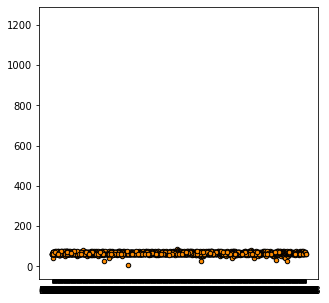

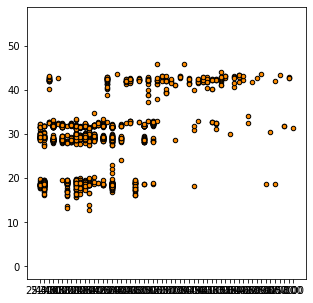

In [12]:
def plot_compare(i):
    plt.figure(figsize=(5,5))
    plt.scatter(Y_test[:,i], Y_test_pred[:,i], s=20, edgecolor="black",c="darkorange", label="data")
    xlim = plt.xlim()
    ylim = plt.ylim()
    MIN = min(xlim[0], ylim[0])
    MAX = max(xlim[1], ylim[1])
    plt.xlim(MIN, MAX)
    plt.ylim(MIN, MAX)
    plt.savefig(os.path.join(SAVE_path, "true_pred_"+str(i)+".png"), dpi=300, bbox_inches='tight', transparent=True)

for i in range(Y_test.shape[1]):
    plot_compare(i)